<a href="https://colab.research.google.com/github/GautamAbhhishek/projects0001/blob/main/Fall_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step # 01 Install All the Required Packages**

In [ ]:
!pip install ultralytics

**Step # 02 Import All the Required Libraries**

In [ ]:
import ultralytics
from ultralytics import YOLO

**Step # 03 Check Ultralytics Version and Setup Completion**

In [ ]:
ultralytics.checks()

**Step 04: Download the Dataset from Roboflow**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="hzoVrDHDbdeFNRLoh2Nq")
project = rf.workspace("pose-detection-twxbg").project("human-activity-ce7zu")
version = project.version(2)
dataset = version.download("yolov8")

In [ ]:
!gdown "https://drive.google.com/uc?id=1kSI3LP8hVRw7dY678sH9OGmdnH7Zi-CE&confirm=t"

In [ ]:
!mkdir dataset

In [ ]:
%cd "/content/dataset/"

In [ ]:
!unzip "/content/Human activity.v2i.yolov8.zip"

In [ ]:
!pwd
%cd /content/

In [ ]:
# *** Change path in data.yaml file for Google Colab ***
# path: /content/dataset
# test: test/images    # relative to 'path'
# train: train/images  # relative to 'path'
# val: valid/images    # relative to 'path'

**Step # 05 Load the YOLO11 Model**

In [ ]:
model = YOLO("yolo11s-pose.pt")

**Step # 06 Train the YOLO11 Pose Model**

In [12]:
results = model.train(data = "/content/dataset/data.yaml", task = "pose", mode = "train", imgsz = 640, epochs = 50, batch = 8)

Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s-pose.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrain

100%|██████████| 755k/755k [00:00<00:00, 23.3MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

 22                  -1  1   1511424  ultralytics.nn.modules.block.C3k2            [768, 512, 1, True]           
 23        [16, 19, 22]  1   1311015  ultralytics.nn.modules.head.Pose             [4, [17, 3], [128, 256, 512]] 
YOLO11s-pose summary: 196 layers, 9,919,399 parameters, 9,919,383 gradients, 23.3 GFLOPs

Transferred 535/541 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 98.2MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 719.8±346.2 MB/s, size: 34.2 KB)


train: Scanning /content/dataset/train/labels... 1126 images, 3 backgrounds, 3 corrupt: 100%|██████████| 1126/1126 [00:01<00:00, 966.03it/s] 

train: /content/dataset/train/images/clideo_editor_3b33d792dfde4f1b8b2dd2fdf082e347_mp4-0048_jpg.rf.3d6a4188d2279fd1b429fcfa0a6ce0eb.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0005      1.0158]
train: /content/dataset/train/images/clideo_editor_3b33d792dfde4f1b8b2dd2fdf082e347_mp4-0049_jpg.rf.245067ff6f6ebf7ab9b38b346ad24ed7.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0005      1.0158]
train: /content/dataset/train/images/clideo_editor_3b33d792dfde4f1b8b2dd2fdf082e347_mp4-0050_jpg.rf.0304242590c31d28441b27bb05c37ee5.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0005      1.0158]
train: New cache created: /content/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 564.3±206.4 MB/s, size: 32.5 KB)


val: Scanning /content/dataset/valid/labels... 324 images, 0 backgrounds, 0 corrupt: 100%|██████████| 324/324 [00:00<00:00, 560.44it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to runs/pose/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/pose/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.17G      1.394      5.846     0.4082      2.863      1.316          6        640: 100%|██████████| 141/141 [00:37<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.69it/s]

                   all        324        326      0.667      0.752      0.724      0.447       0.32      0.368      0.273     0.0715



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.62G      1.439      5.542     0.3806      1.861      1.321          3        640: 100%|██████████| 141/141 [00:33<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.84it/s]


                   all        324        326      0.633       0.58      0.629      0.344      0.346      0.269      0.222     0.0459

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.65G      1.447       5.61      0.389      1.592      1.325          7        640: 100%|██████████| 141/141 [00:31<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.43it/s]


                   all        324        326      0.516      0.637      0.617      0.389      0.474      0.424      0.354      0.106

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.69G      1.412      5.349     0.3665       1.46      1.303          4        640: 100%|██████████| 141/141 [00:30<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.99it/s]

                   all        324        326      0.674      0.675       0.77      0.488      0.562      0.459      0.432      0.123



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.73G      1.379      4.993     0.3621      1.368      1.271          3        640: 100%|██████████| 141/141 [00:29<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  5.05it/s]

                   all        324        326      0.636      0.741      0.761      0.484      0.456      0.591      0.512      0.153



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.77G      1.336      4.814     0.3569      1.243      1.253          2        640: 100%|██████████| 141/141 [00:30<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  5.06it/s]

                   all        324        326      0.722      0.712      0.737      0.437      0.571      0.549      0.522      0.161



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.81G       1.32      4.741      0.339      1.212      1.252          5        640: 100%|██████████| 141/141 [00:29<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  4.07it/s]

                   all        324        326      0.791      0.851      0.885      0.562       0.69      0.656      0.644      0.252



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.85G      1.245      4.502     0.3326      1.135      1.216          5        640: 100%|██████████| 141/141 [00:30<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  5.01it/s]

                   all        324        326      0.822      0.789      0.873      0.576      0.663      0.645      0.621      0.214



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.89G      1.276      4.318     0.3252      1.092      1.222          3        640: 100%|██████████| 141/141 [00:30<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.99it/s]

                   all        324        326      0.848      0.846      0.894      0.591      0.694      0.693      0.668      0.233



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.94G      1.234      4.192     0.3245      1.054      1.211          8        640: 100%|██████████| 141/141 [00:29<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  4.07it/s]

                   all        324        326       0.92      0.794      0.897      0.607      0.791      0.672      0.679       0.26



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.98G       1.19      4.162     0.3012      1.038      1.186          5        640: 100%|██████████| 141/141 [00:29<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.94it/s]

                   all        324        326       0.82      0.902      0.914      0.637      0.716      0.751      0.734      0.308



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.02G      1.186          4     0.3062      1.036      1.183          9        640: 100%|██████████| 141/141 [00:31<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  5.02it/s]

                   all        324        326      0.845      0.886      0.893       0.62      0.709      0.752      0.704      0.328



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.06G      1.175      3.863     0.2984     0.9608      1.171          4        640: 100%|██████████| 141/141 [00:29<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  4.01it/s]

                   all        324        326       0.87      0.879      0.911      0.639      0.755      0.711      0.707      0.286



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.11G      1.149      3.914     0.3156     0.9741      1.176          5        640: 100%|██████████| 141/141 [00:30<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.85it/s]

                   all        324        326       0.87      0.865      0.902      0.641      0.765      0.757      0.726      0.317



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.15G      1.125      3.657     0.2881      0.934       1.15          5        640: 100%|██████████| 141/141 [00:30<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  5.13it/s]

                   all        324        326       0.83      0.893      0.918      0.656      0.744      0.799      0.779      0.329



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.19G      1.113      3.573     0.2824     0.8947      1.143          3        640: 100%|██████████| 141/141 [00:31<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.46it/s]

                   all        324        326      0.876      0.892      0.925      0.684      0.758      0.788      0.768      0.359



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.37G      1.089      3.568     0.2814     0.8973      1.145         10        640: 100%|██████████| 141/141 [00:29<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.49it/s]


                   all        324        326      0.863      0.873       0.93      0.665      0.786      0.726      0.775      0.344

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.41G      1.102      3.539     0.2803     0.8869      1.141          7        640: 100%|██████████| 141/141 [00:29<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  5.05it/s]

                   all        324        326       0.91      0.868      0.927       0.65      0.802      0.793      0.813      0.376



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.46G      1.129      3.464     0.2722      0.896      1.151          4        640: 100%|██████████| 141/141 [00:30<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.84it/s]

                   all        324        326      0.905      0.889      0.934      0.664      0.816      0.799      0.813      0.385



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      20/50       3.5G      1.042      3.371       0.26     0.8422       1.11          9        640: 100%|██████████| 141/141 [00:29<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.49it/s]

                   all        324        326        0.9      0.912      0.925      0.669       0.83      0.841      0.825      0.401



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.54G      1.032      3.382     0.2779     0.8119      1.126          4        640: 100%|██████████| 141/141 [00:29<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  5.04it/s]

                   all        324        326      0.885      0.908      0.942      0.706      0.795      0.814      0.815      0.392



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.58G      1.038      3.145      0.265     0.7907      1.111          8        640: 100%|██████████| 141/141 [00:30<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.93it/s]

                   all        324        326      0.879      0.896      0.942      0.706      0.796      0.808      0.837      0.427



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.62G      1.006      3.235     0.2597     0.7731      1.101          5        640: 100%|██████████| 141/141 [00:29<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  4.18it/s]

                   all        324        326       0.88      0.869      0.943      0.698      0.811      0.789      0.845      0.428



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.67G     0.9993      3.119      0.269     0.7779      1.101          3        640: 100%|██████████| 141/141 [00:29<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.62it/s]

                   all        324        326      0.919      0.894      0.942      0.707      0.855      0.832      0.859      0.437



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.71G      1.001      3.024     0.2544      0.765      1.107          6        640: 100%|██████████| 141/141 [00:31<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  5.21it/s]

                   all        324        326      0.909      0.892      0.945      0.712      0.831      0.813      0.845      0.412



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.75G     0.9892      3.036     0.2565      0.757        1.1          5        640: 100%|██████████| 141/141 [00:29<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.23it/s]

                   all        324        326      0.902      0.907      0.948      0.718       0.85      0.843      0.881      0.478



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.79G     0.9849      2.992     0.2484     0.7507      1.108          3        640: 100%|██████████| 141/141 [00:29<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  5.11it/s]

                   all        324        326      0.889      0.939      0.955      0.723      0.836      0.883      0.894      0.479



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.84G     0.9908      2.932     0.2417     0.7352      1.089          4        640: 100%|██████████| 141/141 [00:30<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  5.11it/s]

                   all        324        326      0.865      0.939      0.958       0.74      0.831      0.867      0.884       0.52



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.88G     0.9563      2.844     0.2449     0.7322      1.086          5        640: 100%|██████████| 141/141 [00:29<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.25it/s]

                   all        324        326      0.897      0.913      0.958      0.739      0.878       0.81       0.87      0.502



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.92G     0.9535      2.874     0.2474     0.7134      1.087          6        640: 100%|██████████| 141/141 [00:29<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  5.13it/s]

                   all        324        326      0.928      0.882      0.953      0.733      0.884      0.833      0.887        0.5



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.97G     0.9119      2.818     0.2461      0.684      1.072          7        640: 100%|██████████| 141/141 [00:30<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  5.00it/s]

                   all        324        326      0.879      0.943       0.95      0.727      0.862      0.848      0.876      0.512



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.01G     0.9066      2.779     0.2397     0.7024      1.063          4        640: 100%|██████████| 141/141 [00:29<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.44it/s]

                   all        324        326      0.884      0.926      0.954      0.727      0.835      0.876      0.883      0.526



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.05G     0.9089       2.66     0.2366      0.692      1.069          6        640: 100%|██████████| 141/141 [00:29<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  5.20it/s]

                   all        324        326       0.93      0.901      0.958      0.738      0.873      0.831      0.885      0.523



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.09G     0.9151      2.696     0.2398     0.6985      1.056          6        640: 100%|██████████| 141/141 [00:29<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  5.22it/s]

                   all        324        326      0.893      0.945      0.959      0.752      0.847      0.897      0.898       0.51



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.13G     0.8997      2.557     0.2385     0.6664      1.059          2        640: 100%|██████████| 141/141 [00:28<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.33it/s]

                   all        324        326      0.924       0.93      0.959       0.75      0.875      0.893      0.915      0.554



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.18G     0.9029      2.534     0.2266     0.6712      1.066          4        640: 100%|██████████| 141/141 [00:28<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  5.15it/s]

                   all        324        326      0.935      0.931      0.964      0.752      0.887      0.879      0.906       0.57



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.22G     0.8631      2.471     0.2268     0.6778      1.052          5        640: 100%|██████████| 141/141 [00:29<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  5.17it/s]

                   all        324        326      0.937      0.916      0.961      0.754      0.903      0.882      0.919      0.537



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.26G     0.8685       2.49     0.2346     0.6524      1.045          6        640: 100%|██████████| 141/141 [00:29<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.27it/s]

                   all        324        326      0.911      0.919      0.966      0.757      0.877      0.883      0.931      0.578



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.31G     0.8395      2.412     0.2223     0.6216      1.029          4        640: 100%|██████████| 141/141 [00:29<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  5.11it/s]

                   all        324        326       0.94      0.894      0.966       0.77      0.909      0.853       0.92      0.597



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.37G     0.8596      2.385     0.2236     0.6266      1.055          9        640: 100%|██████████| 141/141 [00:30<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  5.04it/s]

                   all        324        326      0.941       0.91      0.967      0.765      0.911      0.872       0.93      0.606


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.46G     0.7703      1.814     0.1922     0.5261      1.022          3        640: 100%|██████████| 141/141 [00:32<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.83it/s]

                   all        324        326      0.927      0.931       0.97      0.766      0.897      0.881      0.919      0.605



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.51G      0.755      1.743     0.1894     0.5024      1.002          3        640: 100%|██████████| 141/141 [00:28<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.68it/s]

                   all        324        326      0.922      0.896      0.966      0.771      0.895      0.862      0.929      0.618



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.71G     0.7355      1.661     0.1782     0.4892     0.9971          3        640: 100%|██████████| 141/141 [00:28<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  5.06it/s]

                   all        324        326      0.931      0.916      0.964      0.772      0.905      0.892      0.938      0.618



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.75G     0.6955      1.615     0.1767     0.4804     0.9908          3        640: 100%|██████████| 141/141 [00:28<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.36it/s]

                   all        324        326      0.924       0.93      0.964      0.782      0.898      0.904      0.935      0.621



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.79G     0.6991      1.598     0.1789     0.4672     0.9933          3        640: 100%|██████████| 141/141 [00:28<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  5.08it/s]

                   all        324        326      0.945      0.914      0.964      0.768      0.918      0.886      0.936      0.615



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.84G     0.6836       1.53     0.1739     0.4573     0.9759          3        640: 100%|██████████| 141/141 [00:29<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  5.22it/s]

                   all        324        326      0.936      0.922      0.963      0.775      0.912      0.897      0.936      0.626



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.88G     0.6699      1.531     0.1735      0.453     0.9786          3        640: 100%|██████████| 141/141 [00:28<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.28it/s]

                   all        324        326      0.926      0.947      0.962      0.785      0.924      0.906      0.935      0.621



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.92G     0.6601      1.465     0.1689     0.4457     0.9732          3        640: 100%|██████████| 141/141 [00:28<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  5.11it/s]

                   all        324        326      0.943      0.936      0.964      0.784       0.92      0.913       0.94       0.64



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.96G     0.6465      1.428     0.1674     0.4253     0.9667          3        640: 100%|██████████| 141/141 [00:29<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.79it/s]

                   all        324        326      0.941      0.935      0.966       0.79       0.92      0.914      0.942       0.65



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.01G     0.6363      1.401     0.1663     0.4306     0.9631          3        640: 100%|██████████| 141/141 [00:28<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.61it/s]


                   all        324        326      0.939      0.941      0.967      0.794      0.918       0.92      0.944      0.652

50 epochs completed in 0.489 hours.
Optimizer stripped from runs/pose/train/weights/last.pt, 20.2MB
Optimizer stripped from runs/pose/train/weights/best.pt, 20.2MB

Validating runs/pose/train/weights/best.pt...
Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-pose summary (fused): 109 layers, 9,904,101 parameters, 0 gradients, 23.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.08it/s]


                   all        324        326       0.94       0.94      0.967      0.794      0.918       0.92      0.943      0.652
             Fall-Down         91         91      0.983      0.956      0.989      0.876      0.937      0.912      0.927      0.729
               Sitting        104        104      0.972      0.989      0.993      0.902      0.953      0.971      0.984      0.729
              Standing         84         84       0.93      0.929      0.961      0.695      0.929      0.929      0.964      0.632
               Walking         47         47      0.874      0.888      0.925      0.703      0.853      0.868      0.898      0.518
Speed: 0.3ms preprocess, 6.0ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/pose/train


**Step # 07 Validate Custom Model**

In [13]:
#Validate the Model
metrics = model.val()

Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-pose summary (fused): 109 layers, 9,904,101 parameters, 0 gradients, 23.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 922.6±307.3 MB/s, size: 36.2 KB)


val: Scanning /content/dataset/valid/labels.cache... 324 images, 0 backgrounds, 0 corrupt: 100%|██████████| 324/324 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:07<00:00,  5.81it/s]


                   all        324        326      0.939       0.94      0.967      0.795      0.918       0.92      0.944      0.652
             Fall-Down         91         91      0.982      0.956      0.989      0.878      0.937      0.912      0.928      0.729
               Sitting        104        104      0.972      0.989      0.993      0.907      0.953      0.971      0.984      0.729
              Standing         84         84      0.929      0.929      0.962      0.695      0.928      0.929      0.964      0.633
               Walking         47         47      0.874      0.888      0.925      0.699      0.854      0.868      0.898      0.518
Speed: 1.0ms preprocess, 10.3ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/pose/train2


In [14]:
metrics.box.map

np.float64(0.7947988303319458)

In [15]:
metrics.box.map50

np.float64(0.9671668920915737)

In [16]:
metrics.box.map75

np.float64(0.8700976186806822)

In [17]:
metrics.box.maps

array([    0.87816,      0.9071,     0.69504,     0.69889])

**Step # 08 Results Analysis**

**Confusion Matrix**

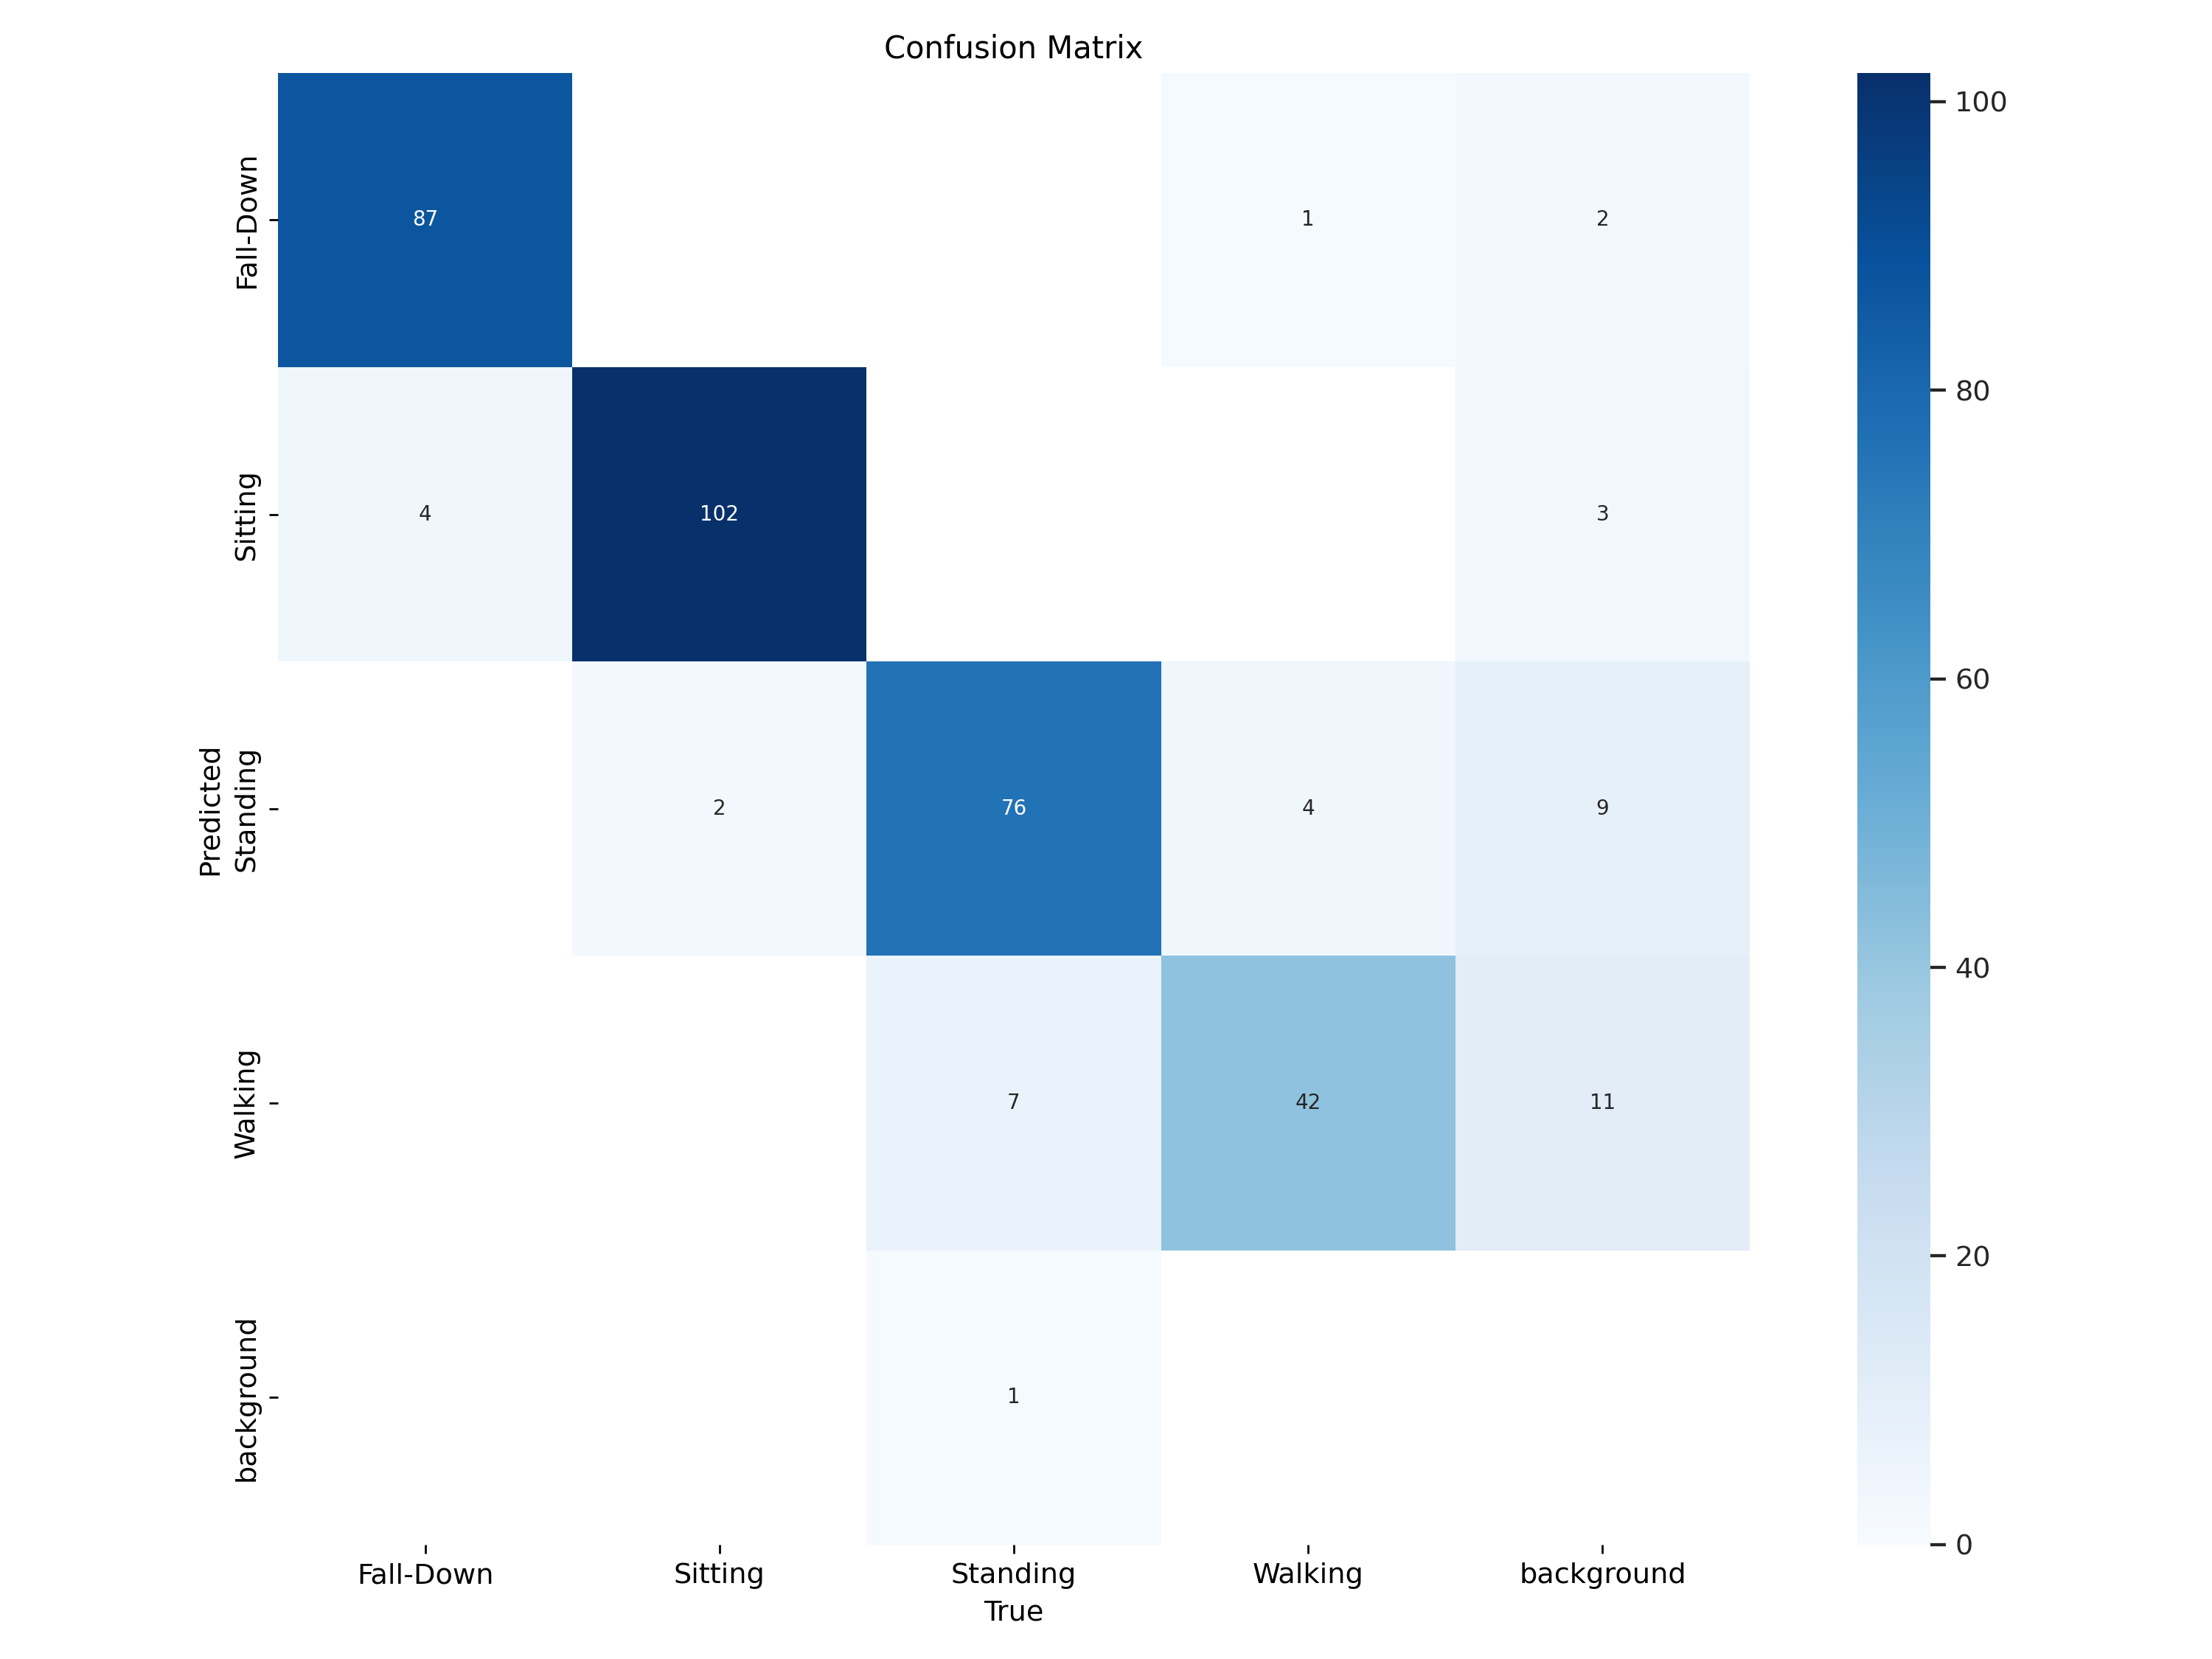

In [18]:
from IPython.display import Image, display
Image("/content/runs/pose/train2/confusion_matrix.png", width = 800)

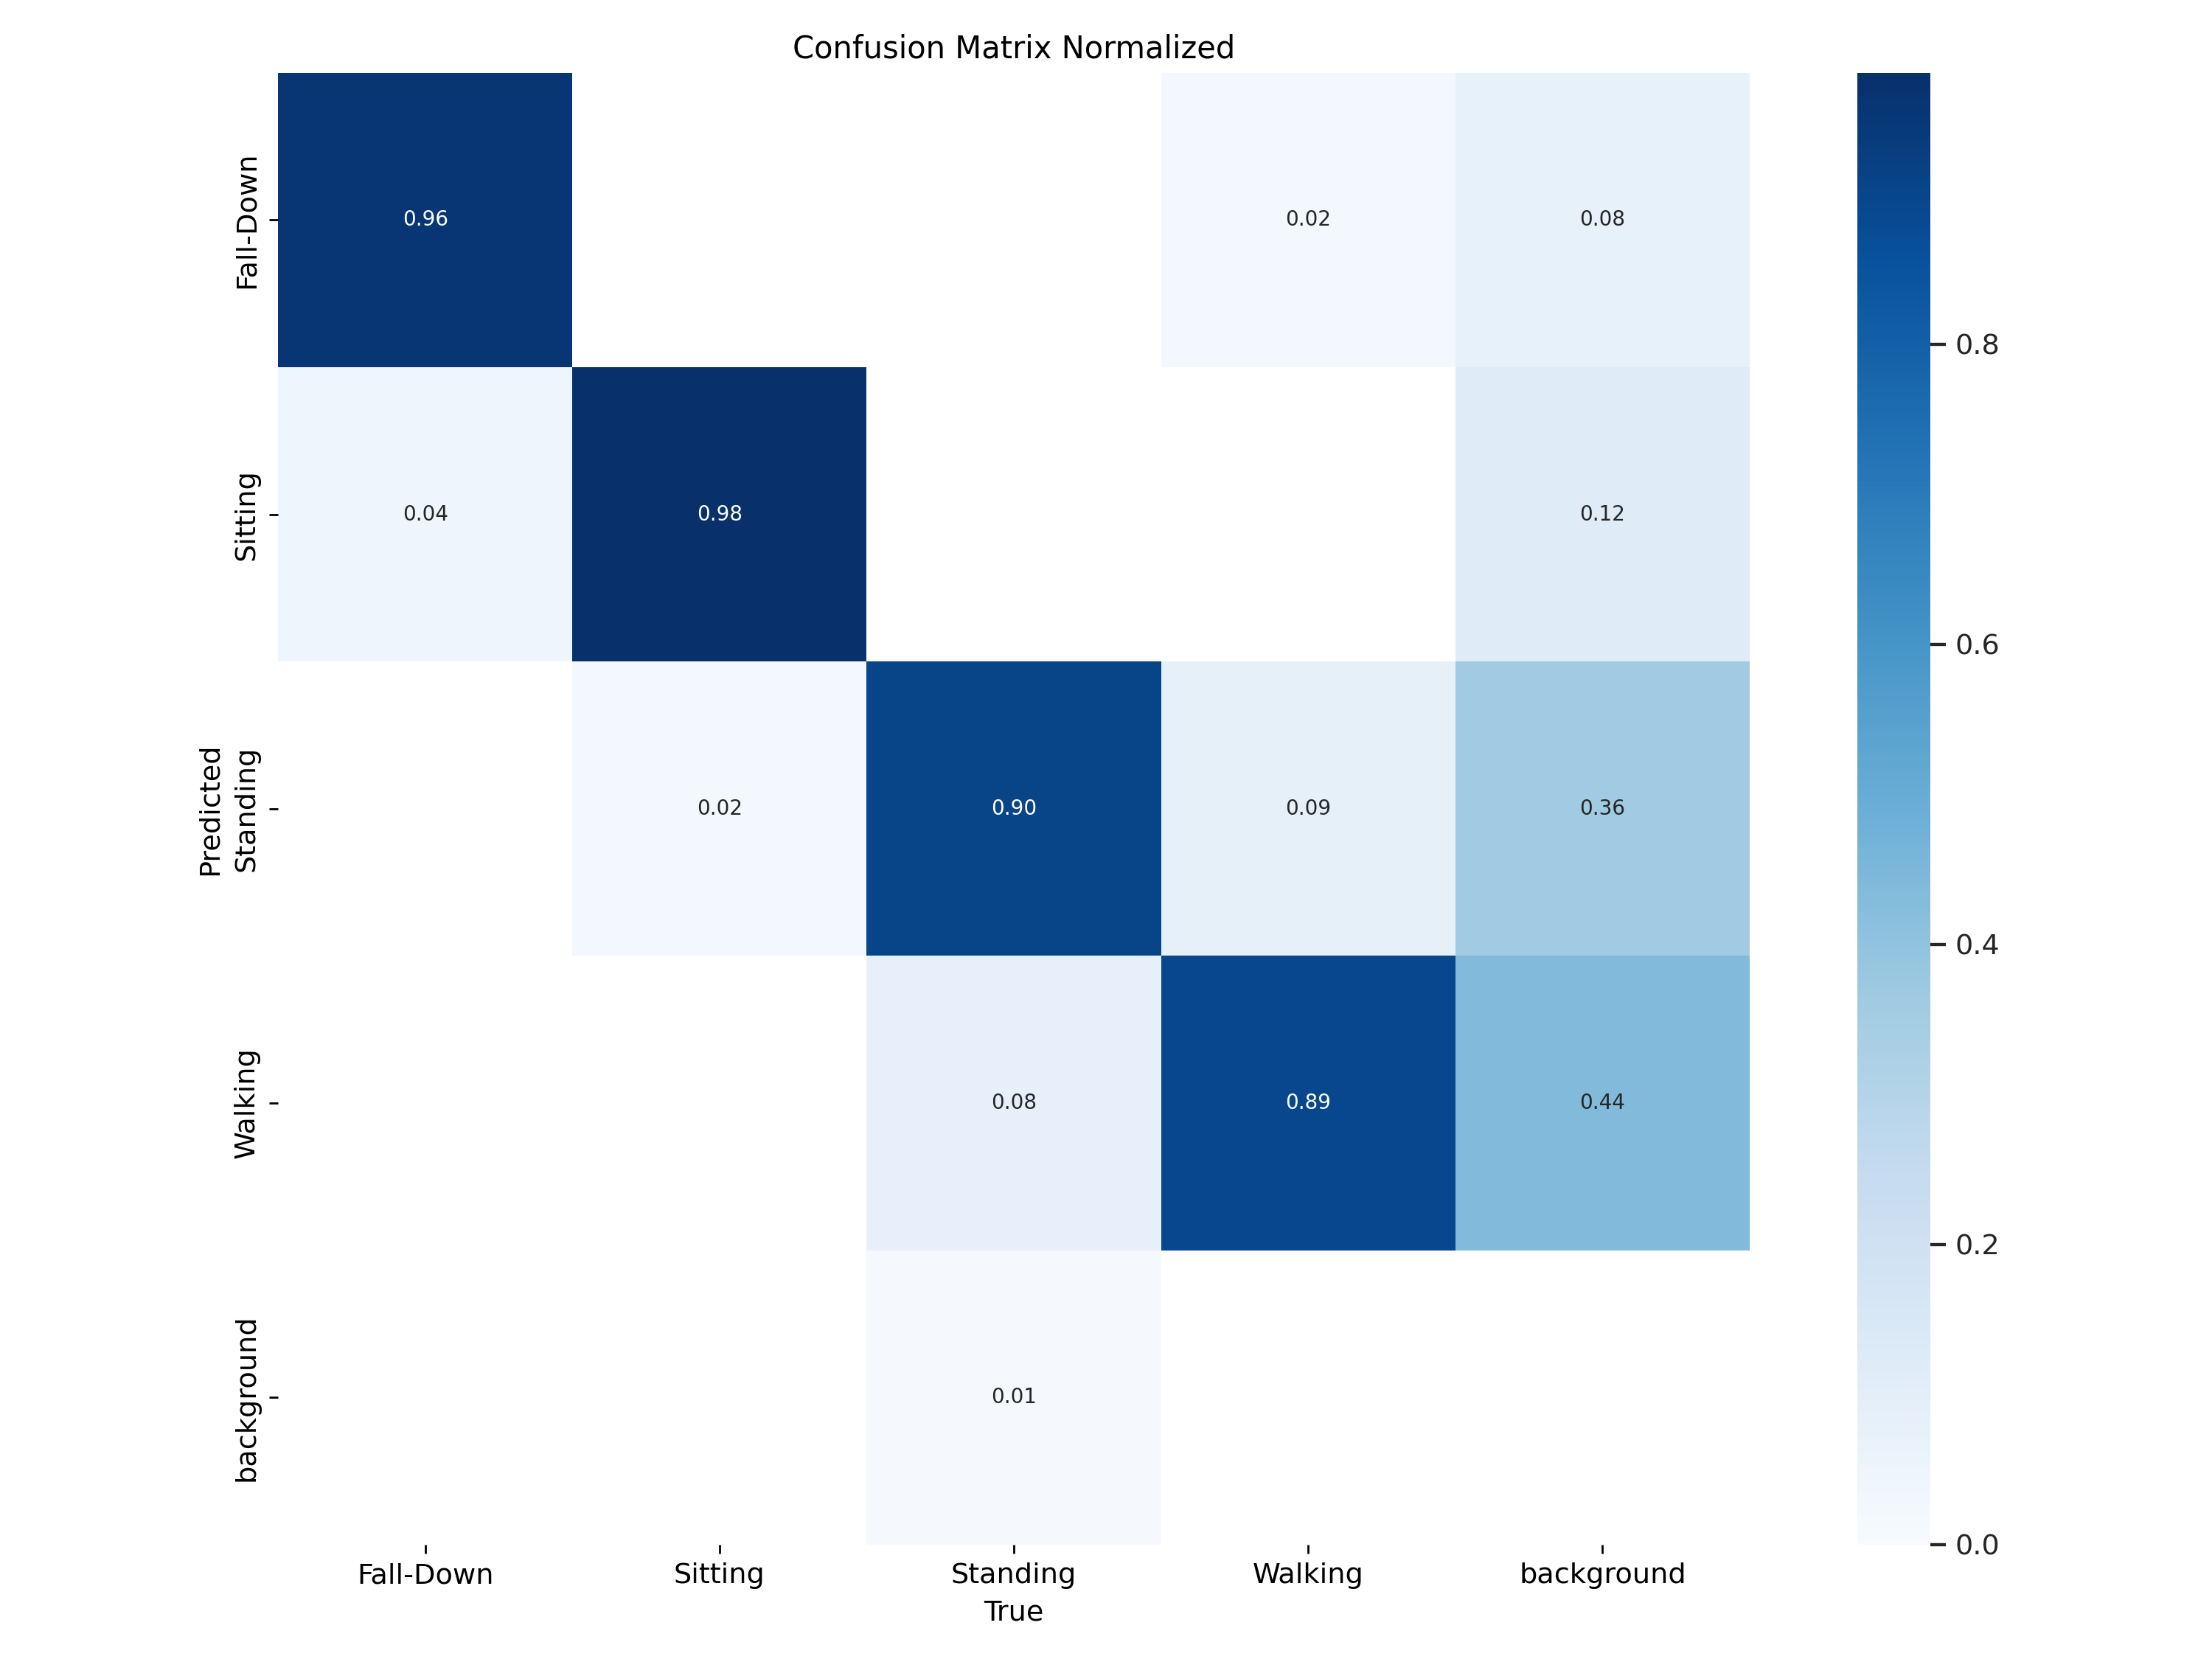

In [19]:
from IPython.display import Image, display
Image("/content/runs/pose/train2/confusion_matrix_normalized.png", width = 800)

**Percision Curve**

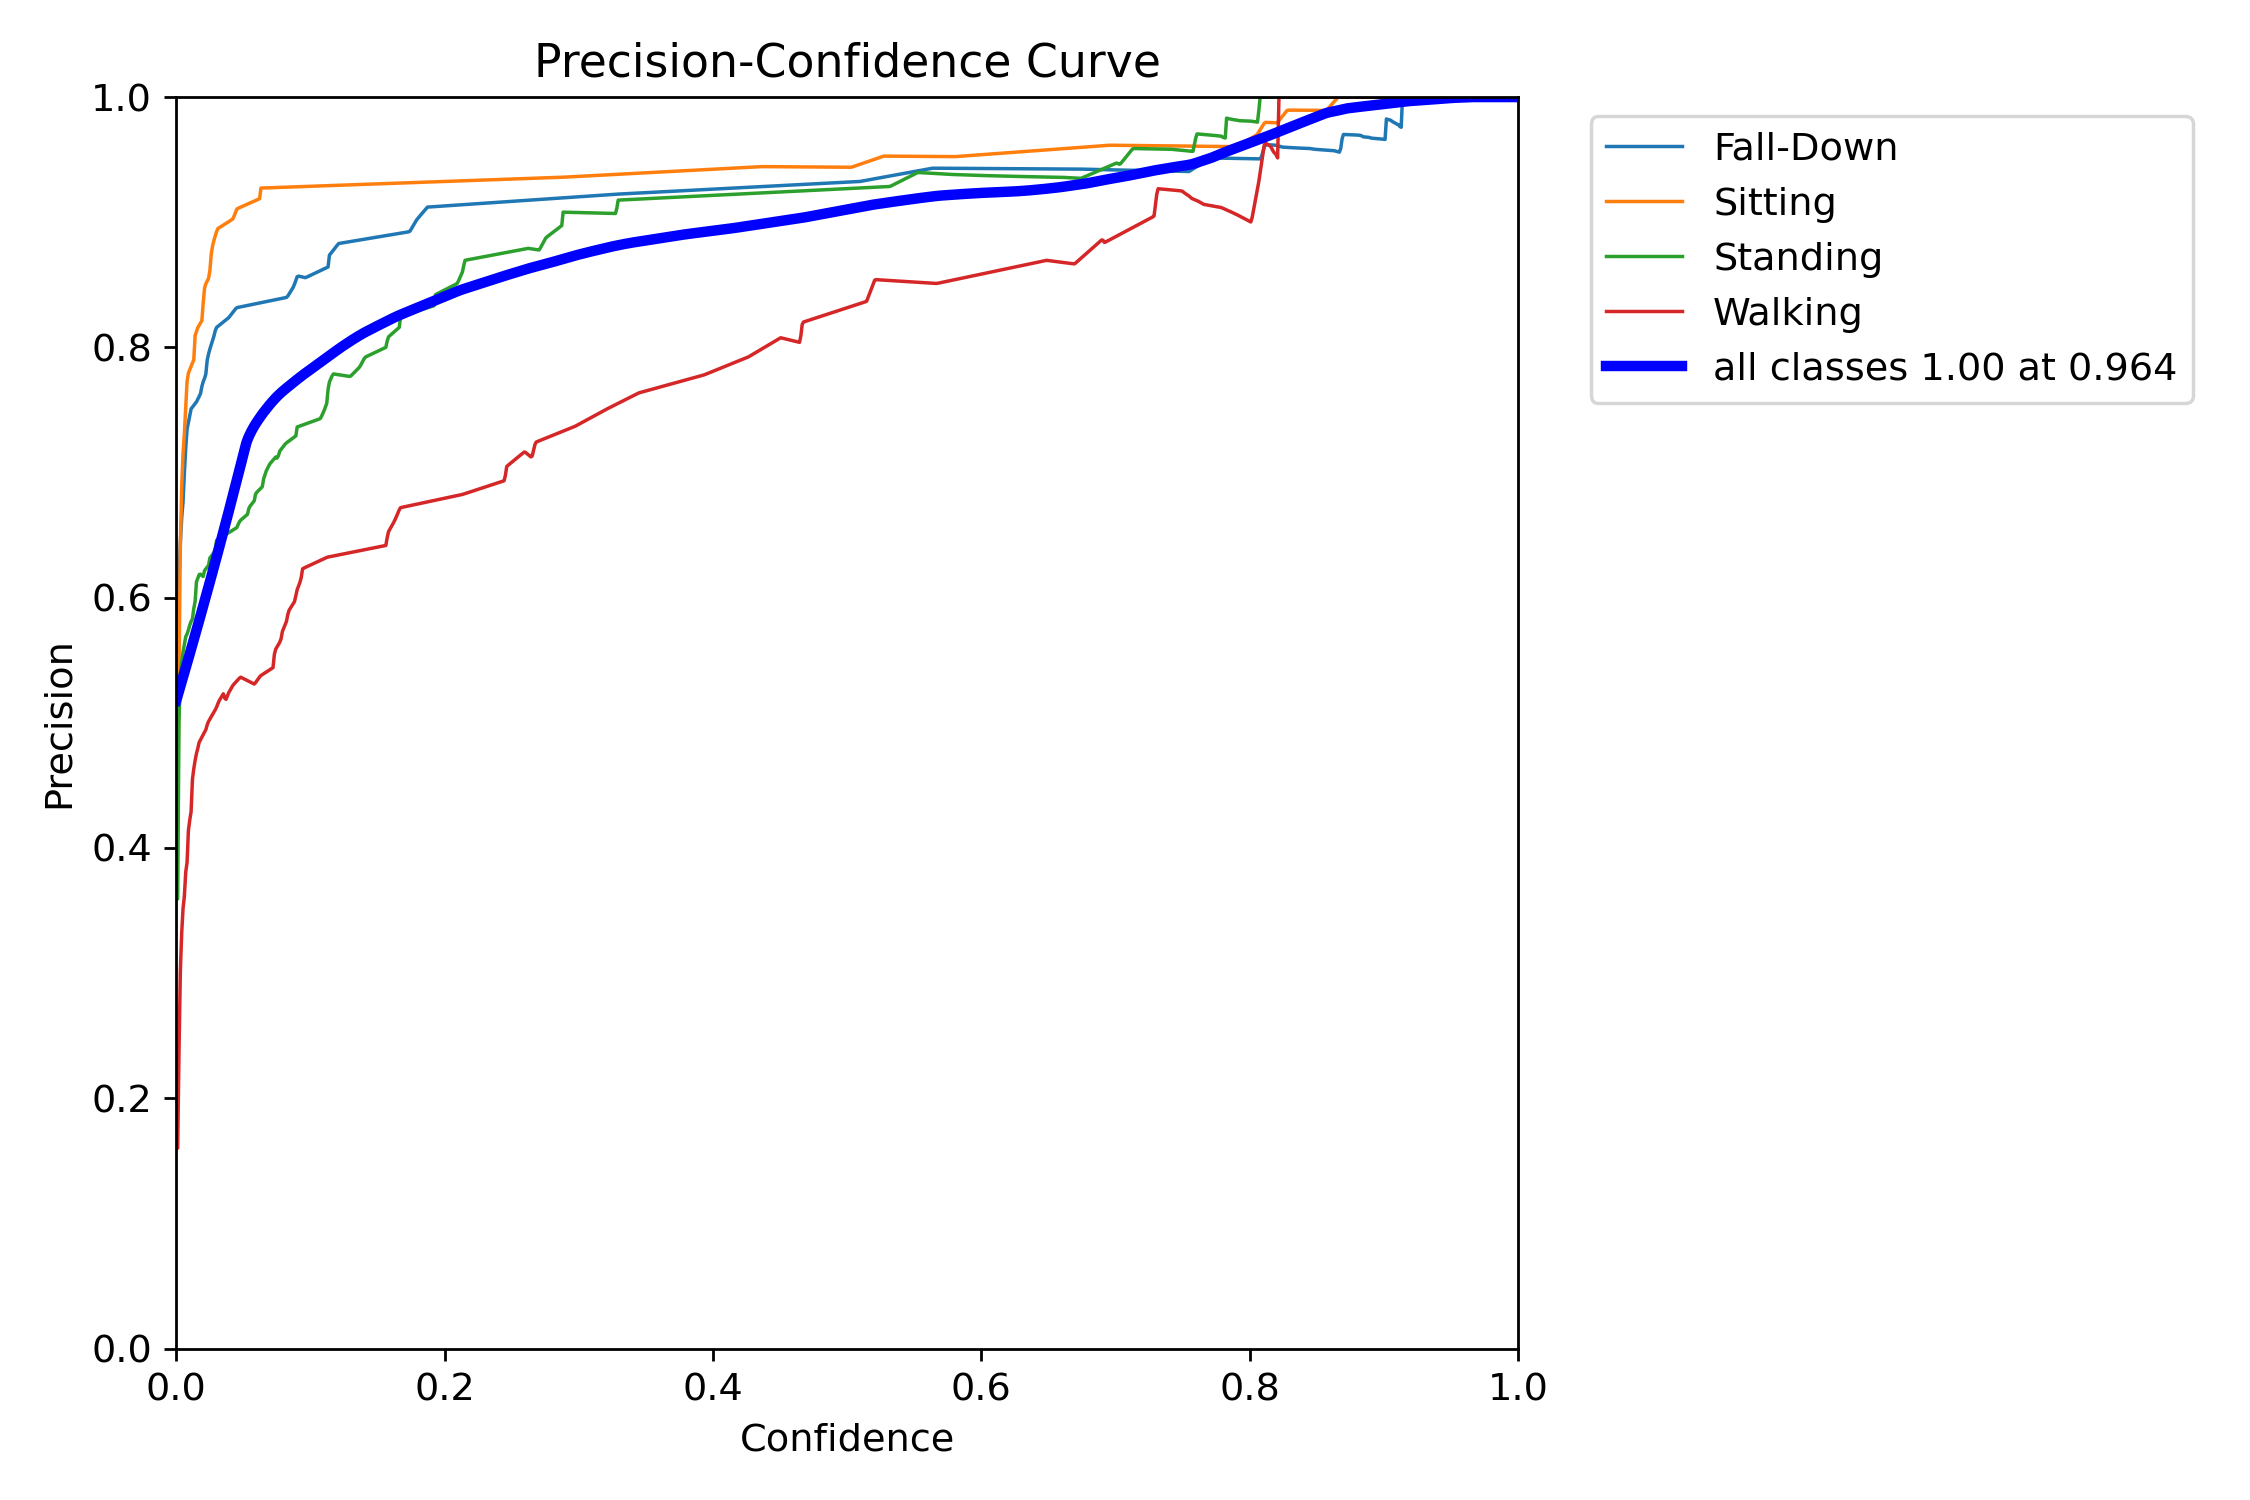

In [20]:
Image("/content/runs/pose/train2/PoseP_curve.png", width = 900)

**Recall Curve**

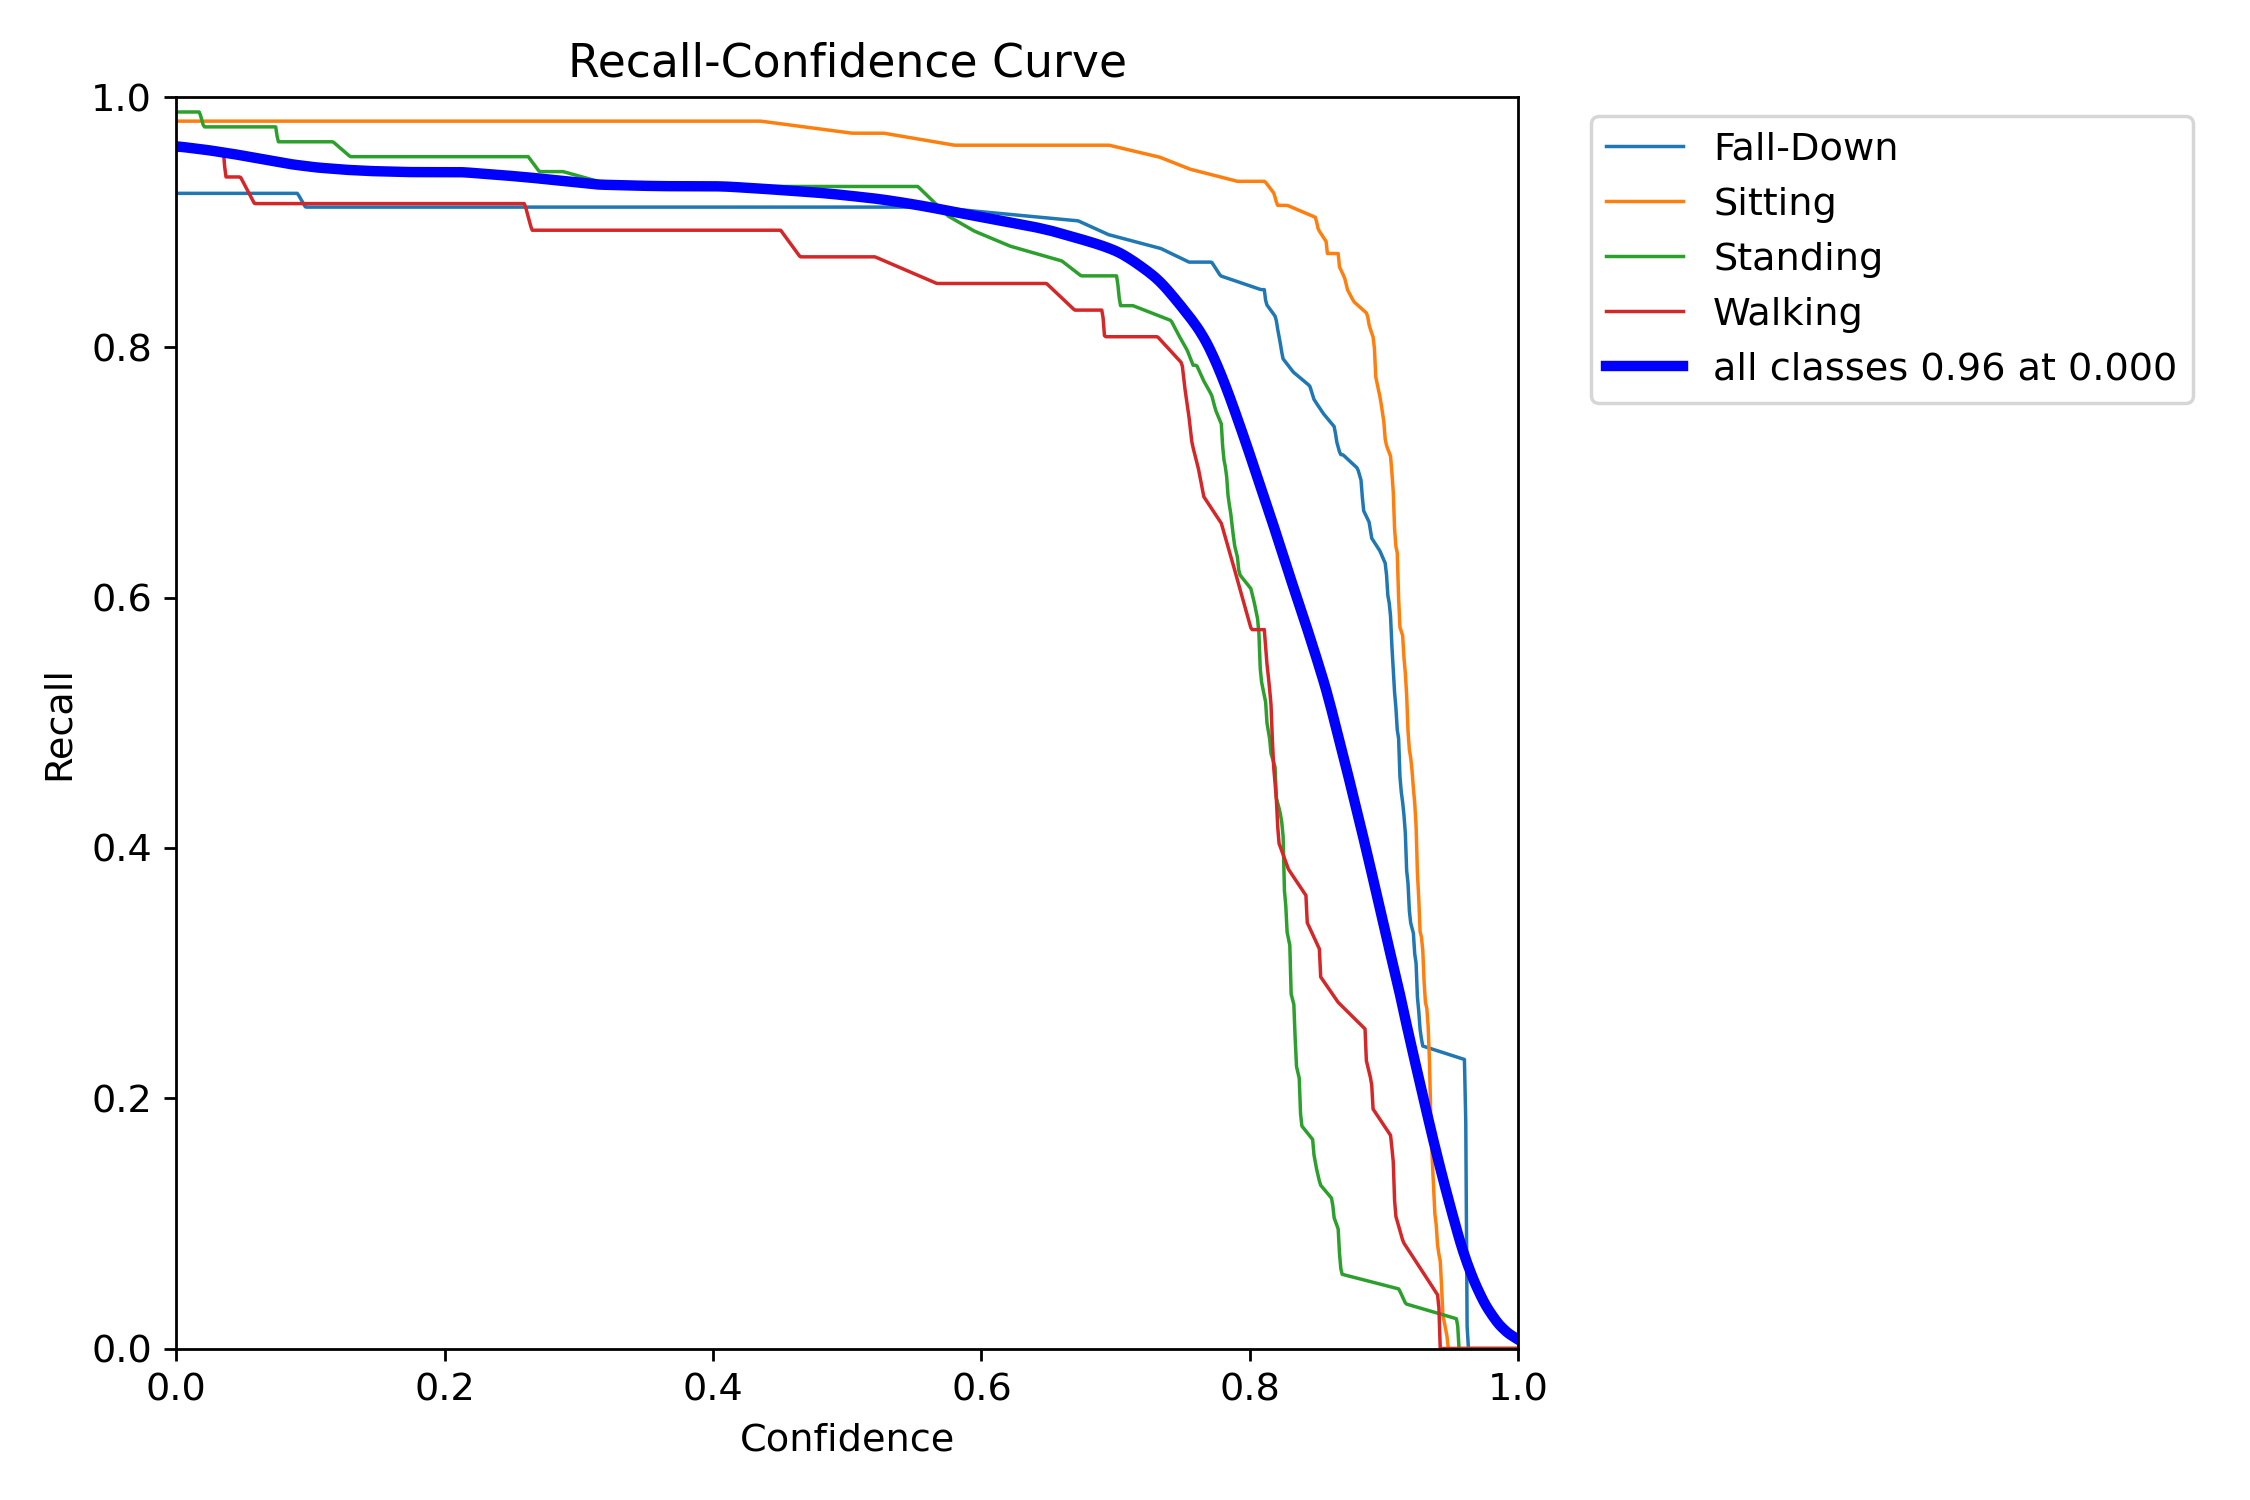

In [21]:
Image("/content/runs/pose/train2/PoseR_curve.png", width = 800)

**Model Predictions on Validation Batch**

In [ ]:
Image("/content/runs/pose/train2/val_batch1_pred.jpg", width = 800)

In [ ]:
Image("/content/runs/pose/train2/val_batch2_pred.jpg", width = 800)

**Step # 09 Inference on Test Dataset Images using the Trained/ Fine-Tune Pose Estimation Model**

In [ ]:
!gdown "https://drive.google.com/uc?id=1H3cfzzH9v3T9k9TNj8oaUy_sf-PH1kTA&confirm=t"

In [ ]:
#Load Trained Model
model = YOLO("/content/best.pt")
#Specify the test folder path
test_path = "/content/dataset/test/images"
#List all the images in the test folder
import os
image_files = [os.path.join(test_path, img) for img in os.listdir(test_path) if img.endswith(('.jpg', '.jpeg', '.png'))]

#Predict each images
for img_path in image_files:
  results = model.predict(source = img_path, save = True, conf = 0.25)

**Step # 10 Plot Prediction on Test Images**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Plot prediction on test images

# Specify the predict folder path
pred_path = '/content/runs/pose/predict'

# List all images in the predict folder
pred_image_files = [os.path.join(pred_path, img) for img in os.listdir(pred_path) if img.endswith(('.jpg', '.jpeg', '.png'))]

# Number of images per row
images_per_row = 5

# Calculate the number of rows needed
n_rows = len(pred_image_files) // images_per_row + int(len(pred_image_files) % images_per_row != 0)

# Set figure size
fig, axs = plt.subplots(n_rows, images_per_row, figsize=(15, 3 * n_rows))

# Flatten axes if necessary (for easier iteration)
axs = axs.flatten()

# Loop through each image and display it
for i, img_path in enumerate(pred_image_files):
    img = mpimg.imread(img_path)      # Read the image
    axs[i].imshow(img)                # Show the image
    axs[i].axis('off')                # Turn off axis
    axs[i].set_title(f"Image {i+1}")  # Add title

# Hide any extra empty subplots (if the number of images is not a perfect multiple of images_per_row)
for j in range(i+1, len(axs)):
    axs[j].axis('off')  # Hide unused axes

# Display all images
plt.tight_layout()
plt.show()


**Step # 10 Inference on Video**

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!gdown "https://drive.google.com/uc?id=19jREqMUWoJgixJgwgeHvvsPu82neJITp&confirm=t"

In [ ]:
results = model.predict(source = "/content/video1.mp4", save = True, conf = 0.25, iou = 0.2)

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/pose/predict3/video1.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)